In [ ]:
!pip install numpy matplotlib seaborn scikit-learn

k=1, Accuracy=0.98
k=2, Accuracy=0.98
k=3, Accuracy=0.98
k=4, Accuracy=0.98
k=5, Accuracy=0.99
k=6, Accuracy=0.99
k=7, Accuracy=0.99
k=8, Accuracy=0.99
k=9, Accuracy=0.98
k=10, Accuracy=0.98


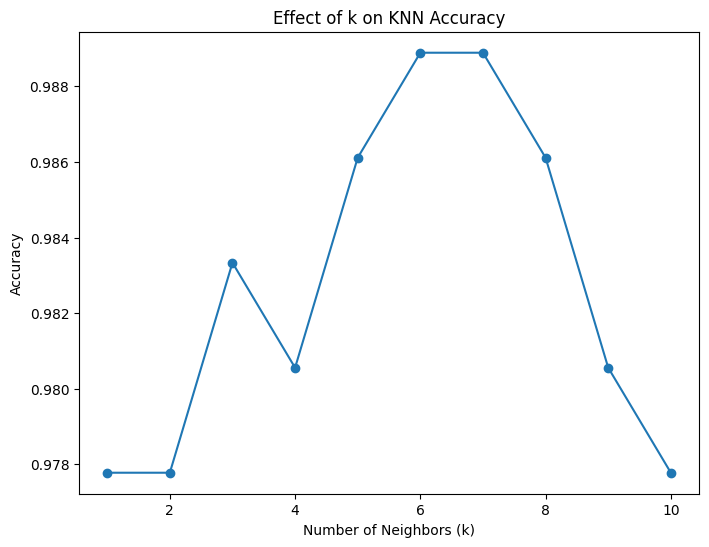

In [1]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

digits = datasets.load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict_one(x) for x in X]
        return np.array(predictions)

    def _predict_one(self, x):
        # Compute distances between x and all points in the training set
        distances = np.linalg.norm(self.X_train - x, axis=1)
        # Get the k nearest samples
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k={k}, Accuracy={accuracy:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Effect of k on KNN Accuracy')
plt.show()
